# Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


#  Load and Prepare the Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


# Define the Model

In [3]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])


/Users/gerardchristiankuotu/mnist-project/tf_env/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Compile the Model

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# Train the Model

In [5]:
model.fit(x_train, y_train, epochs=5)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 933us/step - accuracy: 0.8698 - loss: 0.4634
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 907us/step - accuracy: 0.9577 - loss: 0.1437
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step - accuracy: 0.9674 - loss: 0.1080
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 911us/step - accuracy: 0.9747 - loss: 0.0839
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 929us/step - accuracy: 0.9784 - loss: 0.0691


# Evaluate the Model

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 0s - 663us/step - accuracy: 0.9794 - loss: 0.0722

Test accuracy: 0.9793999791145325


# Predict and Visualize

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step
Predicted label: 7


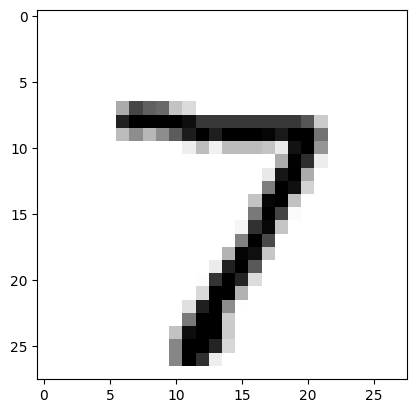

In [7]:
predictions = model.predict(x_test)

print("Predicted label:", np.argmax(predictions[0]))
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()


# SAve the model

In [8]:
model.save('mnist_model.h5')  # Save in HDF5 format


# Load the Model Later

In [10]:
from tensorflow.keras.models import load_model

loaded_model = load_model('mnist_model.h5')

# Optional: check that it works
loaded_model.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - accuracy: 0.9747 - loss: 0.0891


[0.0722004845738411, 0.9793999791145325]

# Use the Loaded Model for Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step
Predicted label: 7


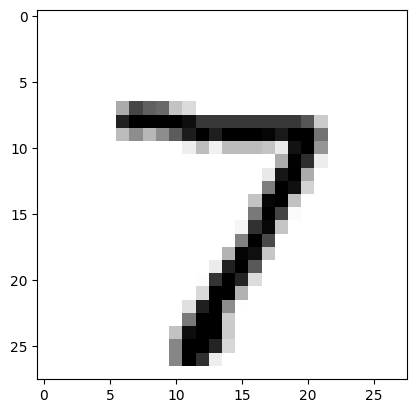

In [11]:
predictions = loaded_model.predict(x_test)

print("Predicted label:", np.argmax(predictions[0]))
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.show()
